In [1]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from datetime import datetime

In [2]:
db_loc = r"C:\Users\NoahLustig\Anaconda3\jupyter\glass_house_eda\glasshouse.db"
conn = sqlite3.connect(db_loc)
c = conn.cursor()

In [3]:
env = pd.read_sql('SELECT * FROM hourly_env_data', conn)
bio = pd.read_sql('SELECT * FROM biopump', conn)

In [4]:
env.drop(['index', 'rain_qty_pct'], axis=1, inplace=True)

In [5]:
env.head(200)

,date_time,31_temp,31_rh,32_temp,32_rh,33_temp,33_rh,34_temp,34_rh,35_co2,35_temp,35_rh,36_temp,36_rh,outside_temp,rained,wind_speed,radiation,rad_sum,35_vpd_top
0,2018-06-05 00:00:00,19.00,77.00,19.40,75.97,20.91,74.00,20.90,75.00,453.73,21.30,70.00,21.80,73.03,14.30,0.0,0.00,0.00,1421.00,0.690
1,2018-06-05 01:00:00,18.60,79.00,18.40,79.00,20.00,76.00,20.20,76.97,434.97,20.10,72.00,20.50,75.00,14.10,0.0,0.00,0.00,1421.00,0.590
2,2018-06-05 02:00:00,18.60,81.00,17.80,81.00,19.80,79.00,19.10,78.97,439.18,19.30,75.00,19.80,76.97,14.20,0.0,0.00,0.00,1421.00,0.500
3,2018-06-05 03:00:00,18.30,82.00,18.20,82.00,19.70,81.00,17.50,81.00,441.39,18.30,79.00,19.00,79.97,14.30,1.0,0.00,0.00,1421.00,0.410
4,2018-06-05 04:00:00,17.80,83.97,18.60,81.97,19.70,82.00,17.89,82.00,445.36,18.30,80.00,18.80,82.00,14.70,0.0,0.00,0.00,1421.00,0.370
5,2018-06-05 05:00:00,18.50,80.97,20.30,74.03,20.50,78.00,18.50,81.00,463.94,19.30,78.00,20.79,76.00,14.80,0.0,0.00,0.00,1421.00,0.420
6,2018-06-05 06:00:00,19.31,80.00,19.00,80.00,19.50,80.00,17.30,84.00,432.51,18.20,81.00,20.51,78.97,15.00,0.0,0.00,0.97,0.00,0.370
7,2018-06-05 07:00:00,18.60,80.00,19.50,76.00,20.70,75.00,17.80,84.00,452.42,18.20,82.00,19.20,83.97,15.10,0.0,0.00,11.97,1.00,0.340
8,2018-06-05 08:00:00,18.50,81.00,19.40,78.00,20.80,75.00,19.30,80.00,452.30,19.49,80.03,20.20,82.00,15.30,0.0,0.00,23.00,8.97,0.379
9,2018-06-05 09:00:00,18.50,81.97,19.59,77.03,20.80,74.00,19.70,77.00,436.67,20.00,78.00,20.60,79.00,15.50,0.0,0.00,41.94,20.94,0.480


In [6]:
env.date_time = pd.to_datetime(env.date_time,format='%Y-%m-%d %H:%M:%S')
print(type(env.date_time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
#bio.drop(['index'], axis=1, inplace=True)
bio.head(50)

,index,Date,Bay,Acremonium,Alternaria,Anungitea group,Arthrobotrys,Arthrinium,Ascospores,Aureobasidium,...,Torula,Trichocladium,Trichoderma,Ulocladium,Unidentified Condidia,Venturia/Fusicladium,Walllemia,Yeasts,Zygophiala,Total
0,0,2018-01-03 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586
1,1,2018-01-03 00:00:00,32,0.0,0.0,0.0,0.0,0.0,27.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996
2,2,2018-01-03 00:00:00,33,0.0,0.0,0.0,0.0,0.0,27.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,588
3,3,2018-01-03 00:00:00,34,0.0,13.0,0.0,0.0,0.0,27.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750
4,4,2018-01-03 00:00:00,35,0.0,13.0,0.0,0.0,0.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420
5,5,2018-01-03 00:00:00,36,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542
6,6,2018-07-31 00:00:00,31,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2949
7,7,2018-07-31 00:00:00,32,0.0,80.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,986
8,8,2018-07-31 00:00:00,33,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1419
9,9,2018-09-10 00:00:00,31,0.0,0.0,0.0,0.0,0.0,27.0,0.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,9140


We're going to get data for 2 days before the first biopump test for which we have environmental data (7/31/18) for each of the bays which were tested that day (bays 31-33).

In [9]:
#set start and end dates
start = datetime(2018, 7,29, 0, 0)
end = datetime(2018, 8, 1, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t1 = env.loc[mask]

C:\Users\NoahLustig\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


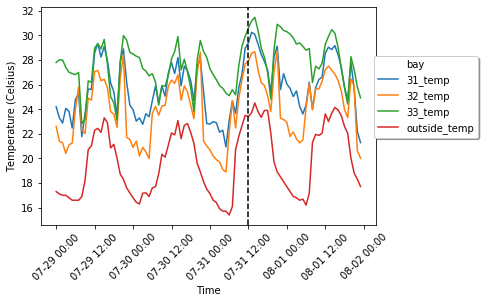

In [10]:
#make melted dataframe to plot several lines at a time
t1m = t1.melt(id_vars=['date_time'], value_vars = ['31_temp', '32_temp', '33_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t1m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('07-31-18 12:00'), color='k', linestyle='--')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

Now, we'll repeat the same steps for the next test which occurred on 9/10 in bays 31-36.

In [11]:
#set start and end dates
start = datetime(2018, 9, 8, 0, 0)
end = datetime(2018, 9, 11, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t2 = env.loc[mask]

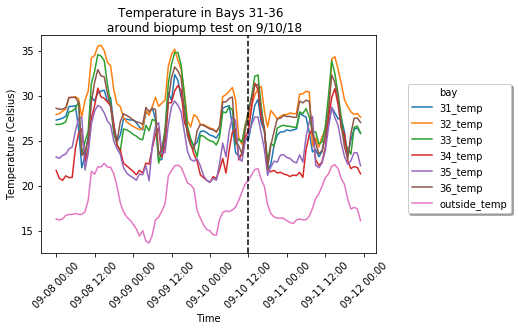

In [12]:
#make melted dataframe to plot several lines at a time
t2m = t2.melt(id_vars=['date_time'], value_vars = ['31_temp', '32_temp', '33_temp', '34_temp', '35_temp', '36_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t2m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 31-36 \n around biopump test on 9/10/18')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-18 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now, we'll repeat the same steps for the next test which occurred on 10/2 in bays 31-36.

In [13]:
#set start and end dates
start = datetime(2018, 9, 30, 0, 0)
end = datetime(2018, 10, 3, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t3 = env.loc[mask]

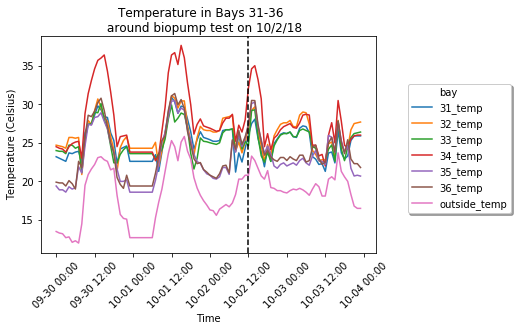

In [14]:
#make melted dataframe to plot several lines at a time
t3m = t3.melt(id_vars=['date_time'], value_vars = ['31_temp', '32_temp', '33_temp', '34_temp', '35_temp', '36_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t3m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 31-36 \n around biopump test on 10/2/18')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-18 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now, we'll repeat the same steps for the next test which occurred on 10/16 in bays 31-36.

In [15]:
#set start and end dates
start = datetime(2018, 10, 14, 0, 0)
end = datetime(2018, 10, 17, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t4 = env.loc[mask]

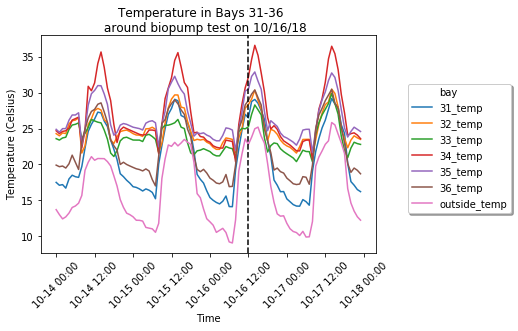

In [16]:
#make melted dataframe to plot several lines at a time
t4m = t4.melt(id_vars=['date_time'], value_vars = ['31_temp', '32_temp', '33_temp', '34_temp', '35_temp', '36_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t4m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 31-36 \n around biopump test on 10/16/18')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-18 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now, we'll repeat the same steps for the next test which occurred on 11/19 in bays 31-36.

In [17]:
#set start and end dates
start = datetime(2018, 11, 17, 0, 0)
end = datetime(2018, 11, 20, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t5 = env.loc[mask]

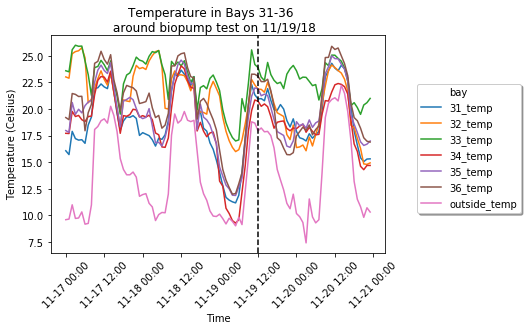

In [18]:
#make melted dataframe to plot several lines at a time
t5m = t5.melt(id_vars=['date_time'], value_vars = ['31_temp', '32_temp', '33_temp', '34_temp', '35_temp', '36_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t5m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 31-36 \n around biopump test on 11/19/18')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-18 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now, we'll repeat the same steps for the next test which occurred on 3/6/19 in bays 32 and 35.

In [19]:
#set start and end dates
start = datetime(2019, 3, 4, 0, 0)
end = datetime(2019, 3, 7, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t6 = env.loc[mask]

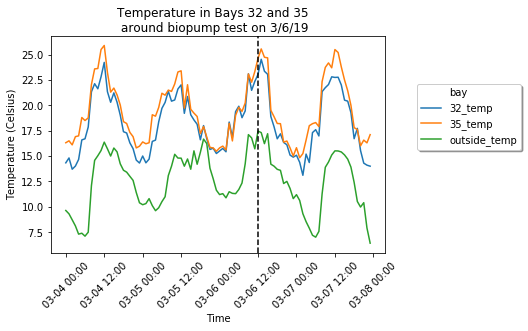

In [20]:
#make melted dataframe to plot several lines at a time
t6m = t6.melt(id_vars=['date_time'], value_vars = ['32_temp', '35_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t6m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 32 and 35\n around biopump test on 3/6/19')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('03-06-2019 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now, we'll repeat the same steps for the next test which occurred on 6/24/19 in bays 32 and 34.

In [21]:
#set start and end dates
start = datetime(2019, 6, 22, 0, 0)
end = datetime(2019, 6, 25, 23, 0)
#make a mask which can be applied to all 3 bays
mask = (env['date_time'] >= start) & (env['date_time'] <= end)

t7 = env.loc[mask]

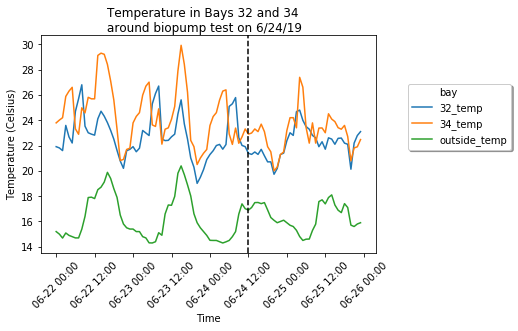

In [22]:
#make melted dataframe to plot several lines at a time
t7m = t7.melt(id_vars=['date_time'], value_vars = ['32_temp', '34_temp', 'outside_temp'],
              var_name='bay', value_name='temp')
#make lineplot
ax = sns.lineplot(data=t7m, x='date_time', y='temp', hue='bay')
ax.set(xlabel='Time',
      ylabel='Temperature (Celsius)')
plt.suptitle('Temperature in Bays 32 and 34\n around biopump test on 6/24/19')

#rotate xtick labels
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('06-24-2019 12:00'), color='k', linestyle='--')
#move legend
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8),
          shadow=True, ncol=1)


Now we are going to plot temperature and RH on one figure against time for each bay and test date.  We'll start with all of the test dates for Bay 31

In [23]:
t1.head(20)

,date_time,31_temp,31_rh,32_temp,32_rh,33_temp,33_rh,34_temp,34_rh,35_co2,35_temp,35_rh,36_temp,36_rh,outside_temp,rained,wind_speed,radiation,rad_sum,35_vpd_top
1296,2018-07-29 00:00:00,24.20,58.00,22.60,75.00,27.80,85.00,24.50,68.00,543.82,30.10,66.00,23.40,73.00,17.30,0.0,0.00,0.00,1319.00,1.171
1297,2018-07-29 01:00:00,23.30,53.14,21.39,80.86,28.01,84.86,24.30,68.00,544.23,30.29,66.00,23.31,73.86,17.11,0.0,0.00,0.00,1319.00,1.160
1298,2018-07-29 02:00:00,22.87,54.00,21.27,81.86,28.00,85.00,24.11,69.00,545.27,30.31,67.00,23.21,74.00,17.00,0.0,0.00,0.00,1319.00,1.130
1299,2018-07-29 03:00:00,24.07,58.00,20.41,84.00,27.41,87.00,24.23,69.00,538.64,30.31,68.00,23.30,75.00,17.00,0.0,0.00,0.00,1319.00,1.090
1300,2018-07-29 04:00:00,23.83,64.00,21.09,82.00,27.00,88.00,24.29,71.00,548.86,30.10,70.00,23.50,75.00,16.80,0.0,0.00,0.00,1319.00,0.991
1301,2018-07-29 05:00:00,22.47,63.00,21.25,85.14,26.90,89.00,23.11,74.00,556.91,29.69,72.00,21.63,79.86,16.60,0.0,0.00,0.00,1319.00,0.900
1302,2018-07-29 06:00:00,24.79,64.00,23.96,84.86,26.81,90.00,24.79,77.86,424.00,23.06,69.27,24.46,81.00,16.60,0.0,0.00,0.00,1319.00,0.781
1303,2018-07-29 07:00:00,25.29,69.00,25.79,92.86,26.99,91.00,25.49,84.00,430.45,22.89,71.00,26.29,87.00,16.60,0.0,0.00,18.45,1.86,0.711
1304,2018-07-29 08:00:00,21.77,63.59,22.31,81.14,22.83,79.14,22.14,78.86,413.18,23.73,72.86,23.69,79.00,16.89,0.0,0.00,57.86,16.73,0.729
1305,2018-07-29 09:00:00,23.60,54.14,22.01,82.00,23.17,76.14,24.12,77.00,399.32,24.47,72.14,24.19,77.00,18.19,0.0,0.00,143.45,53.32,0.816


Text(0.5, 0.98, 'Temperature and RH-Bay 31')

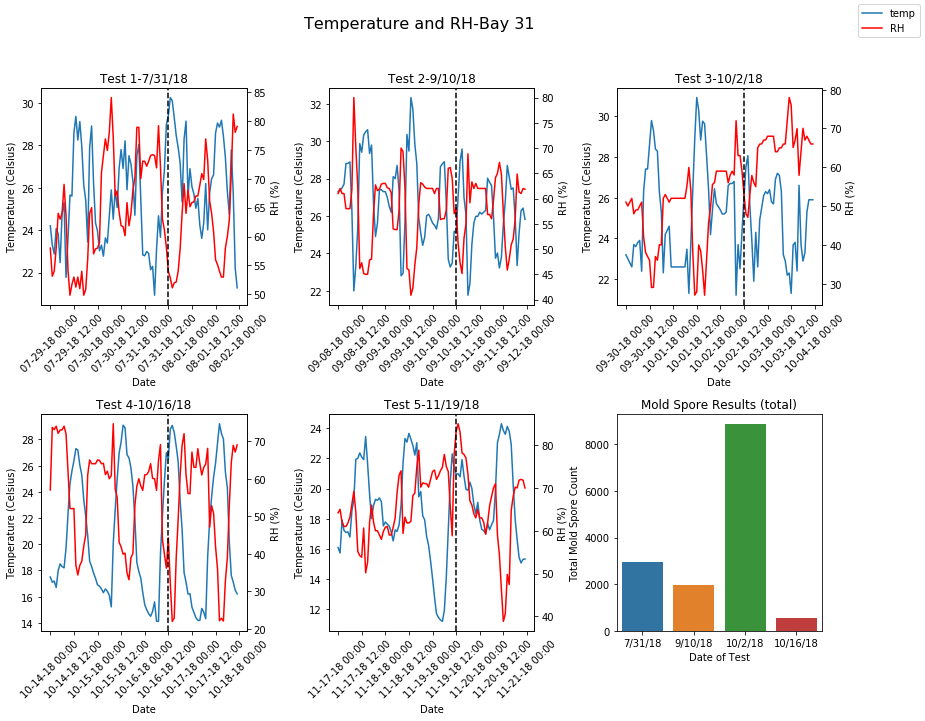

In [36]:
f, ax = plt.subplots(2,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t1, x='date_time', y='31_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()

#plot second line
sns.lineplot(data=t1, x='date_time', y='31_rh', ax=ax2, color='r', label='RH', legend=False)

#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-7/31/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('07-31-2018 12:00'), color='k', linestyle='--')






#plot first subplot
sns.lineplot(data=t2, x='date_time', y='31_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t2, x='date_time', y='31_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t3, x='date_time', y='31_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='31_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t4, x='date_time', y='31_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='31_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t5, x='date_time', y='31_temp', ax=ax[1,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,1].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='31_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 5-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,1].get_xticks()
ax[1,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')

#create df that holds bay 31's biopump results
b31 = bio[(bio['Bay']=='31') & (bio['Date'].isin(['2018-07-31 00:00:00',
                                            '2018-07-31 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00']))]
b31.head(50)
#plot barchart of biopump results for final subplot
sns.barplot(data=b31, x='Date', y='Total', ax=ax[1,2])
ax[1,2].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)',
            xticklabels=['7/31/18',
                        '9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18',])





plt.subplots_adjust(wspace=.4, hspace=.5)
plt.suptitle('Temperature and RH-Bay 31', fontsize=16)

Text(0.5, 0.98, 'Temperature and RH-Bay 32')

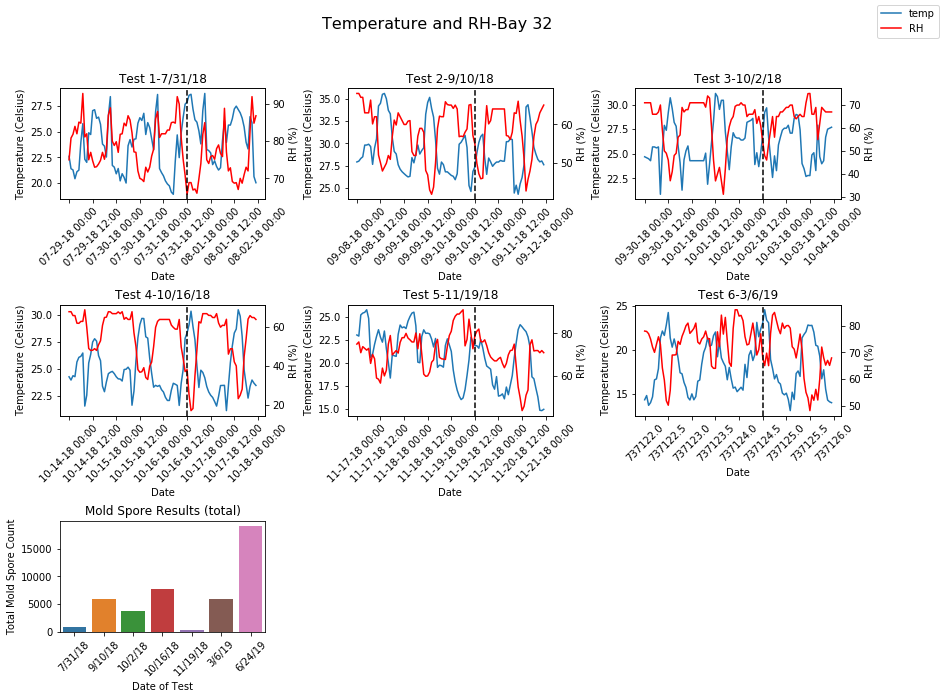

In [46]:
f, ax = plt.subplots(3,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t1, x='date_time', y='32_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()

#plot second line
sns.lineplot(data=t1, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)

#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-7/31/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('07-31-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t2, x='date_time', y='32_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t2, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')




#plot first subplot
sns.lineplot(data=t3, x='date_time', y='32_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')






#plot first subplot
sns.lineplot(data=t4, x='date_time', y='32_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')




#plot first subplot
sns.lineplot(data=t5, x='date_time', y='32_temp', ax=ax[1,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,1].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 5-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,1].get_xticks()
ax[1,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')




#plot first subplot
sns.lineplot(data=t6, x='date_time', y='32_temp', ax=ax[1,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,2].twinx()

#plot second line
sns.lineplot(data=t6, x='date_time', y='32_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 6-3/6/19')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,2].get_xticks()
ax[1,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('03-06-2019 12:00'), color='k', linestyle='--')




#create df that holds this bay's biopump results
b32 = bio[(bio['Bay']=='32') & (bio['Date'].isin(['2018-07-31 00:00:00',
                                            '2018-09-10 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00',
                                            '2019-03-06 00:00:00',
                                             '2019-06-24 00:00:00']))]


#plot barchart of biopump results for final subplot
sns.barplot(data=b32, x='Date', y='Total', ax=ax[2,0], ci=None)
ax[2,0].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)')
ax[2,0].set_xticklabels(['7/31/18',
                        '9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18',
                        '3/6/19',
                         '6/24/19'], rotation=45)

f.delaxes(ax[2,1])
f.delaxes(ax[2,2])

plt.subplots_adjust(wspace=.4, hspace=.95)
plt.suptitle('Temperature and RH-Bay 32', fontsize=16)


#add another subplot for the barplot

Text(0.5, 0.98, 'Temperature and RH-Bay 33')

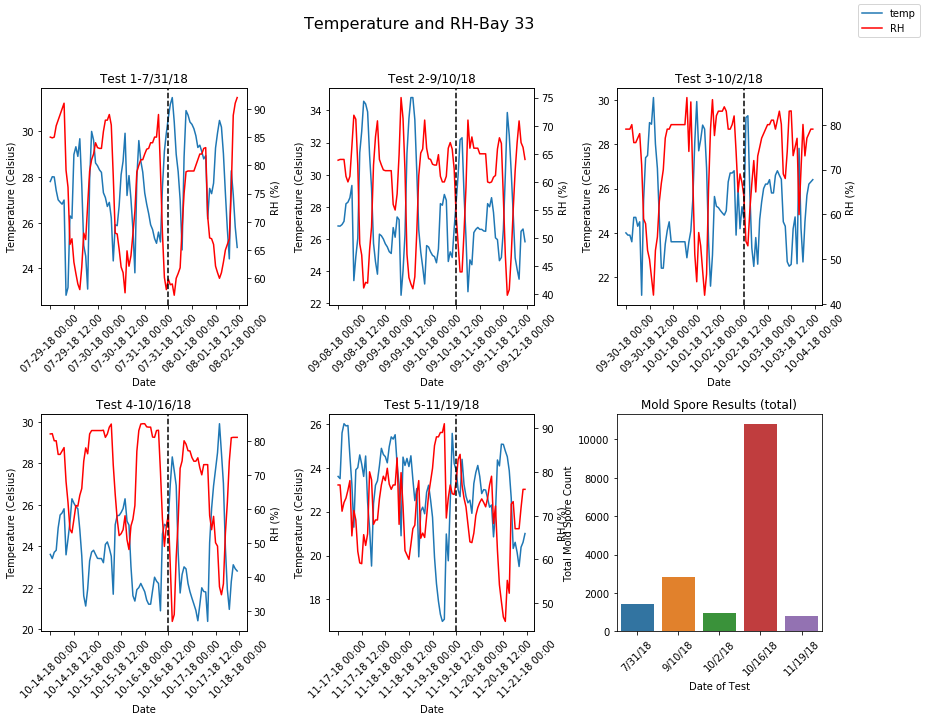

In [49]:
f, ax = plt.subplots(2,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t1, x='date_time', y='33_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()

#plot second line
sns.lineplot(data=t1, x='date_time', y='33_rh', ax=ax2, color='r', label='RH', legend=False)

#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-7/31/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('07-31-2018 12:00'), color='k', linestyle='--')






#plot first subplot
sns.lineplot(data=t2, x='date_time', y='33_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t2, x='date_time', y='33_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t3, x='date_time', y='33_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='33_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t4, x='date_time', y='33_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='33_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t5, x='date_time', y='33_temp', ax=ax[1,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,1].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='33_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 5-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,1].get_xticks()
ax[1,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')


#create df that holds this bay's biopump results
b33 = bio[(bio['Bay']=='33') & (bio['Date'].isin(['2018-07-31 00:00:00',
                                                  '2018-09-10 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00',]))]


#plot barchart of biopump results for final subplot
sns.barplot(data=b33, x='Date', y='Total', ax=ax[1,2])
ax[1,2].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)')

ax[1,2].set_xticklabels(['7/31/18',
                        '9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18'], rotation=45)


plt.subplots_adjust(wspace=.4, hspace=.5)
plt.suptitle('Temperature and RH-Bay 33', fontsize=16)

Text(0.5, 0.98, 'Temperature and RH-Bay 34')

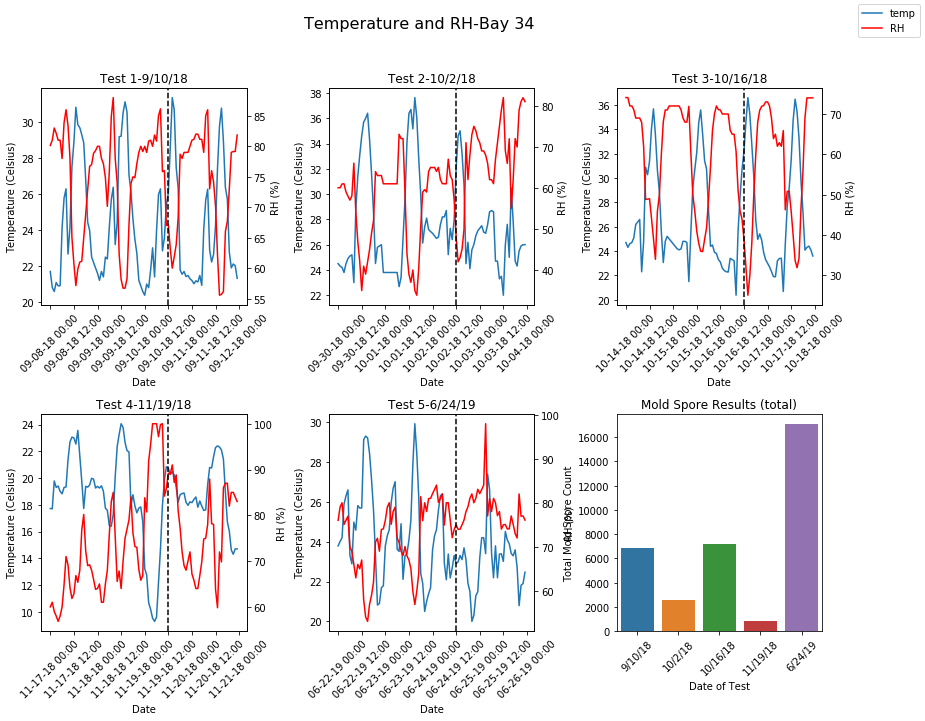

In [51]:
f, ax = plt.subplots(2,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t2, x='date_time', y='34_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()


#plot second line
sns.lineplot(data=t2, x='date_time', y='34_rh', ax=ax2, color='r', label='RH', legend=False)
#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t3, x='date_time', y='34_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='34_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t4, x='date_time', y='34_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='34_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t5, x='date_time', y='34_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='34_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')




#plot first subplot
sns.lineplot(data=t7, x='date_time', y='34_temp', ax=ax[1,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,1].twinx()

#plot second line
sns.lineplot(data=t7, x='date_time', y='34_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 5-6/24/19')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,1].get_xticks()
ax[1,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('06-24-2019 12:00'), color='k', linestyle='--')


#create df that holds this bay's biopump results
b34 = bio[(bio['Bay']=='34') & (bio['Date'].isin(['2018-09-10 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00',
                                            '2019-06-24 00:00:00']))]


#plot barchart of biopump results for final subplot
sns.barplot(data=b34, x='Date', y='Total', ax=ax[1,2])
ax[1,2].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)')

ax[1,2].set_xticklabels(['9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18',
                        '6/24/19'], rotation=45)

plt.subplots_adjust(wspace=.4, hspace=.5)
plt.suptitle('Temperature and RH-Bay 34', fontsize=16)


#make the last one a comparison of all of the total yeast and mold results


Text(0.5, 0.98, 'Temperature and RH-Bay 35')

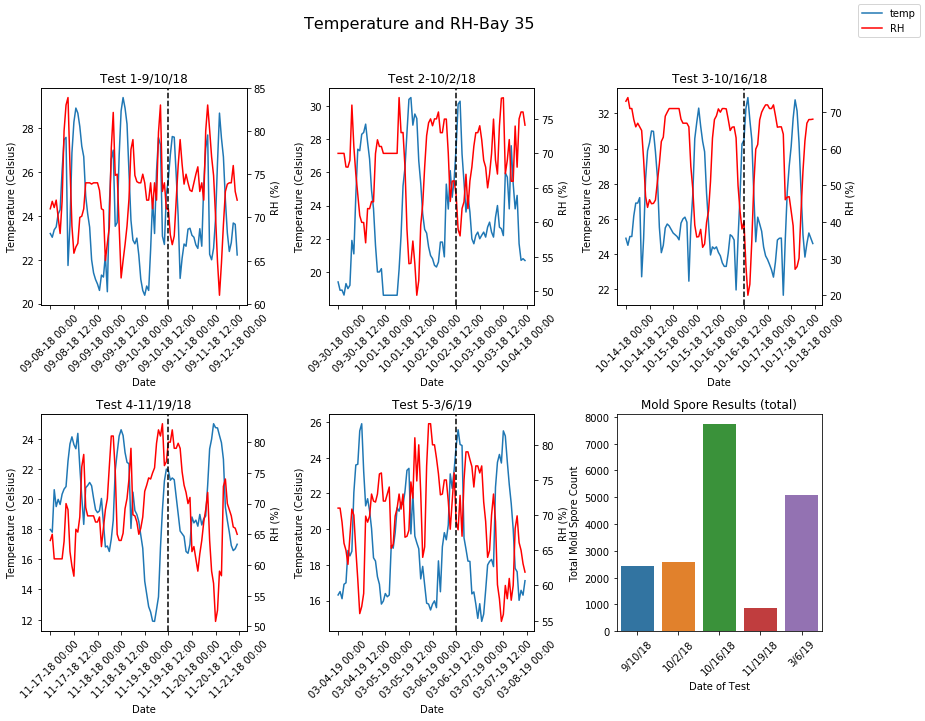

In [53]:
f, ax = plt.subplots(2,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t2, x='date_time', y='35_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()


#plot second line
sns.lineplot(data=t2, x='date_time', y='35_rh', ax=ax2, color='r', label='RH', legend=False)
#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t3, x='date_time', y='35_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='35_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t4, x='date_time', y='35_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='35_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t5, x='date_time', y='35_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='35_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')




#plot first subplot
sns.lineplot(data=t6, x='date_time', y='35_temp', ax=ax[1,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,1].twinx()

#plot second line
sns.lineplot(data=t6, x='date_time', y='35_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 5-3/6/19')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,1].get_xticks()
ax[1,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('03-06-2019 12:00'), color='k', linestyle='--')




#create df that holds this bay's biopump results
b35 = bio[(bio['Bay']=='35') & (bio['Date'].isin(['2018-09-10 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00',
                                            '2019-03-06 00:00:00']))]


#plot barchart of biopump results for final subplot
sns.barplot(data=b35, x='Date', y='Total', ax=ax[1,2])
ax[1,2].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)')

ax[1,2].set_xticklabels(['9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18',
                        '3/6/19'], rotation=45)



plt.subplots_adjust(wspace=.4, hspace=.5)
plt.suptitle('Temperature and RH-Bay 35', fontsize=16)


#make the last one a comparison of all of the total yeast and mold results

Text(0.5, 0.98, 'Temperature and RH-Bay 36')

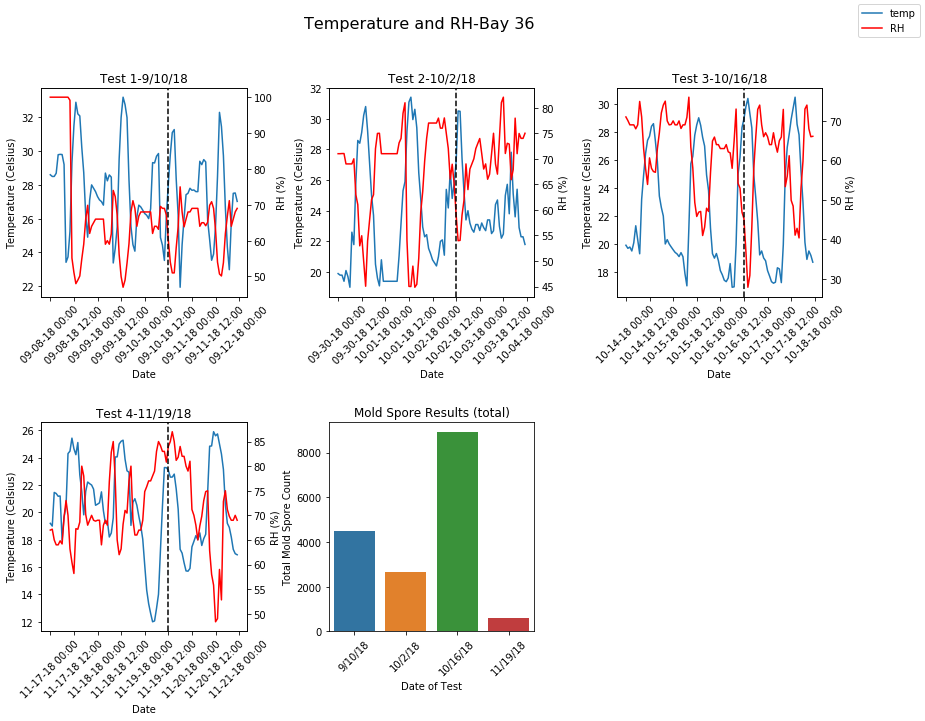

In [58]:
f, ax = plt.subplots(2,3, figsize=(14,10))

#plot first subplot
sns.lineplot(data=t2, x='date_time', y='36_temp', ax=ax[0,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,0].twinx()


#plot second line
sns.lineplot(data=t2, x='date_time', y='36_rh', ax=ax2, color='r', label='RH', legend=False)
#show legend
ax[0,0].figure.legend()

#set axis labels for first line
ax[0,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 1-9/10/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,0].get_xticks()
ax[0,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('09-10-2018 12:00'), color='k', linestyle='--')





#plot first subplot
sns.lineplot(data=t3, x='date_time', y='36_temp', ax=ax[0,1], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,1].twinx()

#plot second line
sns.lineplot(data=t3, x='date_time', y='36_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,1].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 2-10/2/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,1].get_xticks()
ax[0,1].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,1].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-02-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t4, x='date_time', y='36_temp', ax=ax[0,2], label='temp', legend=False)

#get parallell axis
ax2 = ax[0,2].twinx()

#plot second line
sns.lineplot(data=t4, x='date_time', y='36_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[0,2].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 3-10/16/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[0,2].get_xticks()
ax[0,2].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[0,2].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('10-16-2018 12:00'), color='k', linestyle='--')



#plot first subplot
sns.lineplot(data=t5, x='date_time', y='36_temp', ax=ax[1,0], label='temp', legend=False)

#get parallell axis
ax2 = ax[1,0].twinx()

#plot second line
sns.lineplot(data=t5, x='date_time', y='36_rh', ax=ax2, color='r', label='RH', legend=False)


#set axis labels for first line
ax[1,0].set(xlabel='Date', 
            ylabel='Temperature (Celsius)',
            title='Test 4-11/19/18')
#set second y axis label
ax2.set(ylabel='RH (%)')

#rotate xtick labels
xticks = ax[1,0].get_xticks()
ax[1,0].set_xticklabels(xticks, rotation=45)
#format dates to make or
dt_format = DateFormatter('%m-%d-%y %H:%M')
ax[1,0].xaxis.set_major_formatter(dt_format)
#add vertical line to mark the test time
plt.axvline(pd.to_datetime('11-19-2018 12:00'), color='k', linestyle='--')


#create df that holds this bay's biopump results
b36 = bio[(bio['Bay']=='36') & (bio['Date'].isin(['2018-09-10 00:00:00',
                                            '2018-10-02 00:00:00',
                                            '2018-10-16 00:00:00',
                                            '2018-11-19 00:00:00',]))]


#plot barchart of biopump results for final subplot
sns.barplot(data=b36, x='Date', y='Total', ax=ax[1,1])
ax[1,1].set(xlabel='Date of Test',
            ylabel='Total Mold Spore Count',
            title='Mold Spore Results (total)')

ax[1,1].set_xticklabels(['9/10/18',
                        '10/2/18',
                        '10/16/18',
                        '11/19/18'], rotation=45)

f.delaxes(ax[1,2])

plt.subplots_adjust(wspace=.4, hspace=.6)
plt.suptitle('Temperature and RH-Bay 36', fontsize=16)


#make the last one a comparison of all of the total yeast and mold results